- 💡 **Subject:** Data Wrangling / Data Cleaning
- 🖊️ **Author:** Khurram Shahzad  
- 🎓 **Mentor:** Dr. Aammar Tufail  
- ✉️ **Email:** [khurramamq@gmail.com](mailto:khurramamq@gmail.com)  
- 💻 **GitHub:** [zkskhurram](https://github.com/zkskhurram/Python_-My_Small_knowledge/tree/main)

# 🚢 Data Wrangling / Data Cleaning – Titanic Dataset

This notebook is based on notes and demonstrates the full **data wrangling pipeline**:

1. [What is data wrangling / data cleaning?](#1-what-is-data-wrangling--data-cleaning)
2. [Big picture of the data pipeline](#2-big-picture-of-the-data-pipeline)
3. [Setup – libraries and loading Titanic data from seaborn](#3-setup--libraries-and-loading-data)
4. [Gathering the data](#4-step-1--gathering-the-data)
5. [Cleaning the data](#5-step-2--cleaning-the-data) (missing values, duplicates, outliers)
6. [Transforming / normalizing the data](#6-step-3--transforming--normalizing-the-data)
7. [Organizing data (feature engineering)](#7-step-4--organizing-data-feature-engineering)
8. [Saving the final wrangled dataset](#8-step-5--saving-the-wrangled-data)
9. [Key takeaways](#9-key-takeaways)


## 🧼 1. What is Data Wrangling / Data Cleaning?

**Data wrangling (data preprocessing)** is the process of:

- **Cleaning** data
- **Transforming** data
- **Organizing** data

so that it becomes **consistent, accurate, and useful** for analysis or machine learning.

Typical raw data problems:

- **Incomplete** → missing values
- **Inconsistent** → strange or conflicting values (e.g., wrong weights, incomes)
- **Unstructured** → messy formats that are hard to work with

If we don’t clean data properly:

- Our **analysis and hypotheses** can be wrong
- We keep **changing results and reports** again and again
- **Future predictions** become unreliable

👉 Therefore, data wrangling is a **very important step** in the data analytics / data science pipeline.

## 📌 2. Big Picture of the Data Pipeline

For this notebook, we use the **Titanic dataset** from `seaborn` and work in Python.

**Main steps in the pipeline:**

1. Gathering the data
2. Exploring the data (EDA)
3. Cleaning the data
    - Handling missing values
    - Removing duplicates
    - Dealing with outliers
4. Transforming (normalizing / scaling) the data
5. Organizing / feature engineering
6. Saving the final **wrangled** dataset


## ⚙️ 3. Setup – Libraries and Loading Data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn

df = sns.load_dataset("titanic")  # in some setups this is also called 'kashti'

# Basic exploration (part of EDA)

display(df.head())
display(df.describe(include="all"))
df.info()
df.isnull().sum()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 📌 4. Step 1 – Gathering the Data

You **cannot clean what you don’t have**.

Typical data sources:

- CSV files
- Databases (SQL, NoSQL)
- APIs / web services
- Built-in datasets (like seaborn’s `titanic`)

Analogy:

> A person has a broom and a mop, but if there is no house, what will they clean?
>
> Same with data: **first gather the data**, then clean it.

## 🧹 5. Step 2 – Cleaning the Data

Cleaning mainly includes:

1. Handling **missing values**
2. Handling **duplicates**
3. Handling **outliers / errors**


### 🕳️ 5.1 Handling Missing Values (Nulls)

First, check missing values:

- `df.isnull().sum()` → total nulls per column
- `df.isnull().mean() * 100` → percentage of nulls per column

Common strategies:

1. **Drop columns** with too many nulls
2. **Fill (impute)** missing values with:
   - **Mean** (numeric, roughly normal data)
   - **Median** (numeric, skewed data)
   - **Mode** (categorical data)

⚠️ **Important caution:**

Don’t use `df = df.fillna(df.mean())` blindly on the whole DataFrame.
Always choose **specific columns** and **suitable methods**.

In [2]:
# Check missing values

df.isnull().sum(), df.isnull().mean() * 100

(survived         0
 pclass           0
 sex              0
 age            177
 sibsp            0
 parch            0
 fare             0
 embarked         2
 class            0
 who              0
 adult_male       0
 deck           688
 embark_town      2
 alive            0
 alone            0
 dtype: int64,
 survived        0.000000
 pclass          0.000000
 sex             0.000000
 age            19.865320
 sibsp           0.000000
 parch           0.000000
 fare            0.000000
 embarked        0.224467
 class           0.000000
 who             0.000000
 adult_male      0.000000
 deck           77.216611
 embark_town     0.224467
 alive           0.000000
 alone           0.000000
 dtype: float64)

In [3]:
# Example: drop a column with too many nulls (e.g., 'deck')
df = df.drop(columns=['deck'])

# Example: fill numeric column 'age' with mean
df['age'] = df['age'].fillna(df['age'].mean())

# Example: fill categorical column 'embarked' with mode

df['embarked'].fillna(df['embarked'].mode()[0],inplace= True)

# Example: fill categorical column 'embark_town' with mode

df['embark_town'].fillna(df['embark_town'].mode()[0],inplace= True)

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### 📌 5.2 Handling Duplicates

**What is a duplicate row?**

A row where **all column values** are exactly the same as another row.

Steps:

1. Count duplicates → `df.duplicated().sum()`
2. View duplicate rows → `df[df.duplicated()]`
3. Remove duplicates → `df.drop_duplicates(inplace=True)`


In [4]:
# Check for duplicate rows

dup_count = df.duplicated().sum()
print(f"Number of duplicate rows: {dup_count}")

# View duplicates (if any)

df_duplicates = df[df.duplicated()]
display(df_duplicates.head())

# Remove duplicates

df = df.drop_duplicates()

df.shape

Number of duplicate rows: 111


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


(780, 14)

### 📍 5.3 Handling Outliers

Outliers are **extreme or unusual values** that can distort analysis.

We will see:

1. **Visualization with boxplots**
2. **IQR method (Interquartile Range)**
3. (Optional) **Z-score method** using SciPy


#### 📊 (A) Visualization – Boxplots

Boxplots help us see outliers visually.

Example: `fare` by `sex`.

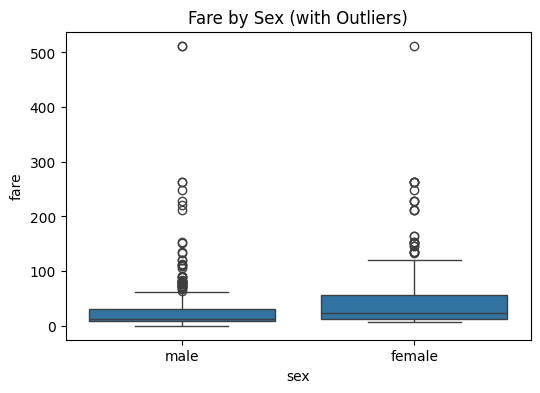

In [5]:
# Boxplot to visually detect outliers in 'fare'

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='sex', y='fare')
plt.title('Fare by Sex (with Outliers)')
plt.show()

#### 📌 (B) IQR Method

For a numeric column (e.g., `fare`):

1. Compute Q1 and Q3:
   - Q1 = 25th percentile
   - Q3 = 75th percentile
2. Compute IQR = Q3 − Q1
3. Compute bounds:
   - Lower bound = Q1 − 1.5 × IQR
   - Upper bound = Q3 + 1.5 × IQR
4. Keep only rows within these bounds.


In [6]:
# IQR method for 'fare'
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1, Q3, IQR:", Q1, Q3, IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

before_shape = df.shape
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
after_shape = df.shape

print("Shape before IQR filtering:", before_shape)
print("Shape after IQR filtering:", after_shape)

Q1, Q3, IQR: 8.05 34.375 26.325
Lower bound: -31.437499999999996
Upper bound: 73.8625
Shape before IQR filtering: (780, 14)
Shape after IQR filtering: (683, 14)


#### 📌 (C) Z-score Method (Optional)

Another method is to use **Z-scores** (requires SciPy):

- Standardize the column.
- Treat rows with |z| > 3 (for example) as outliers.

> In many practical cases, **IQR + visual methods** are enough for intermediate level.

In [7]:
# OPTIONAL: Z-score method for 'age' (requires SciPy)
try:
    from scipy.stats import zscore

    age_non_null = df['age'].dropna()
    z = np.abs(zscore(age_non_null))
    threshold = 3
    print("Number of potential age outliers (|z| > 3):", (z > threshold).sum())
except ImportError:
    print("SciPy is not installed. Run `pip install scipy` to use z-score method.")

Number of potential age outliers (|z| > 3): 7


## 📌 6. Step 3 – Transforming / Normalizing the Data

After cleaning, we **transform** data so it is on a good scale for analysis or machine learning.

Main methods:

1. **Min-Max Normalization**
2. **Standardization (StandardScaler)**
3. **Log Transformation**


### 📌 6.1 Min–Max Normalization

Goal: scale values to a range, often **0 to 1**.

Formula:

\begin{equation}
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\end{equation}

Implementation using `sklearn.preprocessing.MinMaxScaler`.

In [8]:
from sklearn.preprocessing import MinMaxScaler

cols_to_normalize = ['age', 'fare']  # numeric columns
scaler_minmax = MinMaxScaler()

df[cols_to_normalize] = scaler_minmax.fit_transform(df[cols_to_normalize])
df[cols_to_normalize].describe()

,age,fare
count,683.000000,683.000000
mean,0.360895,0.271398
std,0.169857,0.210811
min,0.000000,0.000000
25%,0.258608,0.107823
50%,0.367921,0.183673
75%,0.434531,0.361224
max,1.000000,1.000000


### 📏 6.2 Standardization (StandardScaler)

Goal: make mean = 0 and standard deviation = 1.

Formula:

\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}

Where:

- $\mu$ = mean of the column
- $\sigma$ = standard deviation

This is often used when data is approximately normal and before many ML models.

In [9]:
from sklearn.preprocessing import StandardScaler

cols_to_standardize = ['age', 'fare']
scaler_std = StandardScaler()

df[cols_to_standardize] = scaler_std.fit_transform(df[cols_to_standardize])
df[cols_to_standardize].describe()

,age,fare
count,6.830000e+02,6.830000e+02
mean,7.282283e-17,1.352424e-16
std,1.000733e+00,1.000733e+00
min,-2.126255e+00,-1.288344e+00
25%,-6.026361e-01,-7.765005e-01
50%,4.139422e-02,-4.164337e-01
75%,4.338396e-01,4.264132e-01
max,3.765369e+00,3.458725e+00


### 📌 6.3 Log Transformation

Goal: **reduce skewness** and **compress very large values**.

Works well for columns like `fare` with a long right tail.

Steps:

1. Fill nulls (if any).
2. Apply `np.log` (or `np.log1p` if zeros are present).

Note: Not every normalization works for every column. You should try and see which one fits best.

In [10]:
# Example: log transform on 'fare'
# (Here 'fare' is already standardized above; in practice you usually log-transform
# before scaling. This is just for demonstration.)

# If you want to re-load clean data before this step, you can reload the dataset here.
# For now, let's create a copy and apply log1p (log(1 + x)) to avoid issues with zeros.

df_log_example = sns.load_dataset("titanic").drop(columns=['deck'])
df_log_example['fare'] = df_log_example['fare'].fillna(df_log_example['fare'].mean())

df_log_example['fare_log'] = np.log(df_log_example['fare'])

df_log_example[['fare', 'fare_log']].head()

c:\Users\khurr\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fare,fare_log
0,7.2500,1.981001
1,71.2833,4.266662
2,7.9250,2.070022
3,53.1000,3.972177
4,8.0500,2.085672


## 🧬 7. Step 4 – Organizing Data (Feature Engineering)

After cleaning and transforming, we **organize** data to make analysis easier and more meaningful.

Examples:

1. Creating new features (e.g., `family_size`)
2. Renaming columns
3. Pivot tables / grouped summaries
4. Correlation analysis


### 📌 7.1 Creating a New Column – `family_size`

Using Titanic features:

- `sibsp` = siblings/spouses aboard
- `parch` = parents/children aboard

We can define:

```python
family_size = sibsp + parch
```

Sometimes people add `+ 1` to include the passenger themselves. Whether to add `+ 1` depends on your definition.

In [11]:
# Reload a clean-ish version of the dataset for feature engineering
df_fe = sns.load_dataset("titanic").drop(columns=['deck'])
df_fe['age'] = df_fe['age'].fillna(df_fe['age'].mean())
df_fe['embarked'] = df_fe['embarked'].fillna(df_fe['embarked'].mode()[0])

# Create family_size feature
df_fe['family_size'] = df_fe['sibsp'] + df_fe['parch']

df_fe[['sibsp', 'parch', 'family_size']].head()

,sibsp,parch,family_size
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


### 📌 7.2 Renaming Columns

Renaming columns can make reports and plots more readable.

Example: rename `survived` → `survival`.

In [12]:
# Rename 'survived' to 'survival'
df_fe.rename(columns={'survived': 'survival'}, inplace=True)
df_fe.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

### 📌 7.3 Pivot Tables / Grouped Tables

Example: summarize **average fare** by `pclass` and `survival`.

In [13]:
# Pivot table: average fare by passenger class and survival
table = pd.pivot_table(
    df_fe,
    index='pclass',
    columns='survival',
    values='fare',
    aggfunc='mean'
)
table

survival,0,1
pclass,,
1,64.684007,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


### 📌 7.4 Correlation

After cleaning, we can look at **correlations** between numeric variables.

This can help in feature selection and understanding relationships.

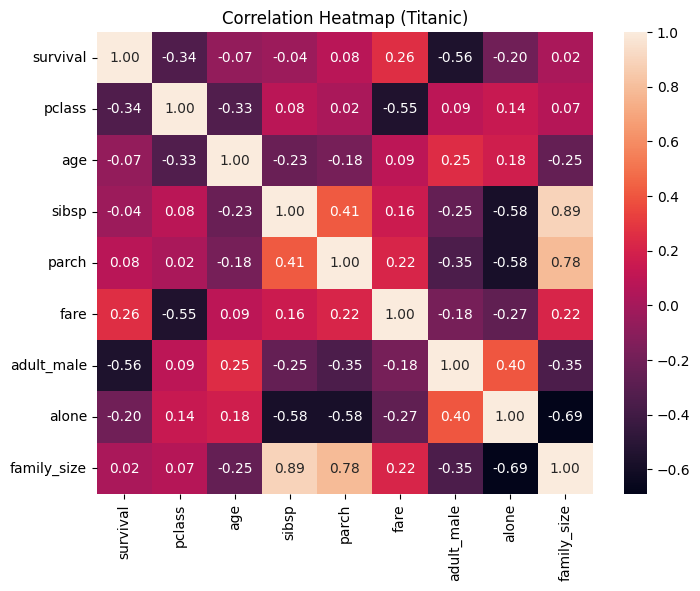

In [14]:
corr = df_fe.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Titanic)")
plt.show()

## 🧼 8. Step 5 – Saving the Wrangled Data

Once the data is:

- Cleaned
- Transformed
- Organized

…we save it for future work (EDA, ML models, reports).

In [15]:
# Example: save the feature-engineered DataFrame
output_path = "preprocessed_titanic_data.csv"
df_fe.to_csv(output_path, index=False)
output_path

'preprocessed_titanic_data.csv'

## 📌 9. Key Takeaways

- **Data wrangling = Cleaning + Transforming + Organizing data**.
- Raw data is usually **incomplete, inconsistent, and unstructured**.
- Main cleaning tasks:
  - Handle missing values (drop / fill with mean, median, mode).
  - Handle duplicates (`df.duplicated()`, `df.drop_duplicates()`).
  - Handle outliers (boxplots, IQR method, z-score method).
- Main transformation tasks:
  - Min–Max scaling (`MinMaxScaler`).
  - Standardization (`StandardScaler`).
  - Log transformation (reduce skew, compress large values).
- Organizing / feature engineering:
  - Create new features like `family_size`.
  - Rename columns and build summary tables.
  - Use correlation and grouped statistics to understand relationships.

This notebook gives you a **practical template** you can reuse for other datasets as well.